In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [41]:
df = pd.read_csv("Downloads/2023-06-13-survey.csv")
df.head()

,Timestamp,Operating System,CPU Cycle Rate (in GHz),CPU Number of Cores (int),RAM (in GB),Hard Drive Size (in GB),GPU (short description as a string),GPU CUDA Number of Cores (int)
0,6/13/2023 13:21:08,Windows,3.0,8,16,935,NVIDIA GeForce RTX 2060 with Max-Q Design,5888
1,6/13/2023 13:23:33,I use Mac and Linux,2133.0,2,8,250,Intel Iris Plus Graphics,1
2,6/13/2023 13:24:29,MacOS,3.2,8,8,256,M1,8
3,6/13/2023 13:25:04,MacOS,3.6,12,32,1000,M2 Max,38
4,6/13/2023 13:25:31,Windows,2.3,8,16,500,NVIDIA GeForce RTX 3050 Ti Laptop GPU,2560


## Now, I will look at the OS differences

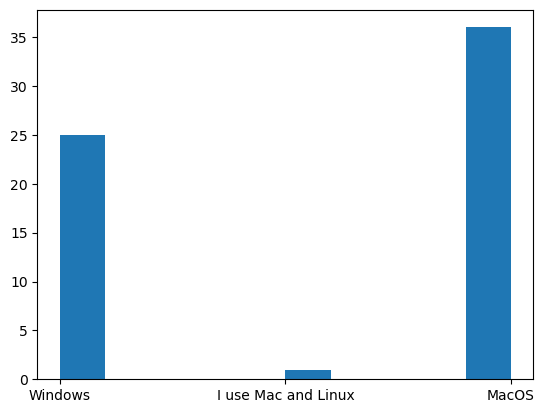

In [42]:
plt.hist(df['Operating System'])
plt.show()

As we can see from the chart above, MacOS is the dominate operating system. There is 1 other that could maybe be added to the MacOS group.

## Now we will switch to numerical data

### CPU Cycle Rate (in GHz)

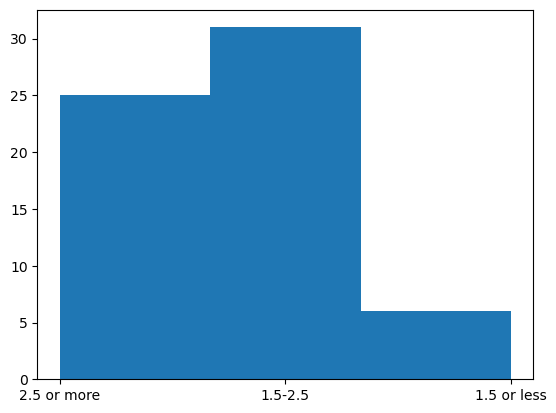

In [8]:
bins_rate = [0, 1.5, 2.5, 2133]
labels_rate = ['1.5 or less', '1.5-2.5', '2.5 or more']
df['CPU_Cycle_bin'] = pd.cut(df['CPU Cycle Rate (in GHz)'], bins=bins_rate, labels=labels_rate)
plt.hist(df['CPU_Cycle_bin'], bins=3)
plt.show()

I decided to start the numerical data with CPU Cycle Rate. I grouped the data manually into 3 bins that I created from just eyeballing the values in the file. As we can see from the above graph, most students are on the high end of cycle rates.

### CPU Number of Cores

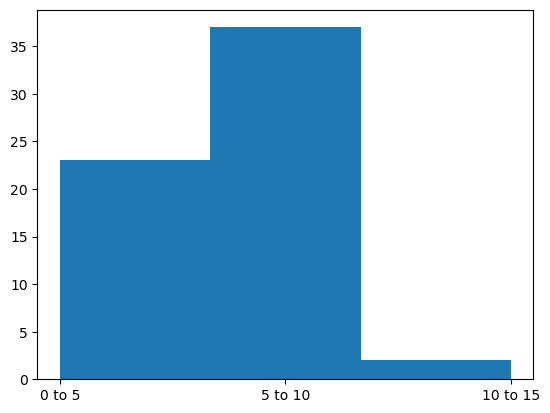

In [35]:
bins_ccore = [0, 5, 10, 15]
labels_ccore = ['5 to 10', '0 to 5', '10 to 15']
df['CPU Cores'] = pd.cut(df['CPU Number of Cores (int)'], bins=bins_ccore, labels=labels_ccore)
plt.hist(df['CPU Cores'], bins=3)
plt.show()

Next, I looked at students reported CPU number of cores. If you look in the code above, the lables are not in the same order as they appear on the graph and I can't figure out why. We can see that most students have average or low CPU cores.

### RAM (in GB)

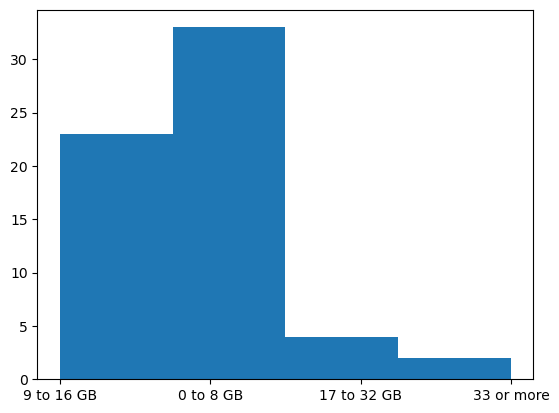

In [43]:
bins_ram = [0, 9, 17, 32, 65]
labels_ram = ['0 to 8 GB', '9 to 16 GB', '17 to 32 GB', '33 or more']
df['RAM_bin'] = pd.cut(df['RAM (in GB)'], bins=bins_ram, labels=labels_ram)
plt.hist(df['RAM_bin'], bins=4)
plt.show()

Looking at the above graph, I still don't know why the labels are no coming in the correct order, but the values associated with the labels are right. We see that mose people have a moderate amount to RAM (most have 8). Few people have high amounts of RAM.

### Hard Drive Size (in GB)

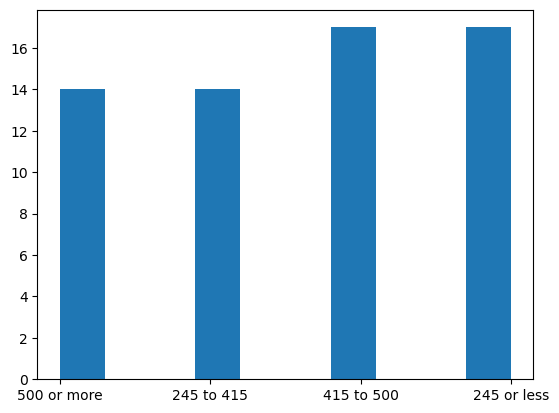

In [46]:
df['hard_bin'] = pd.qcut(df['Hard Drive Size (in GB)'], q=4, labels=
                         ['245 or less', '245 to 415', '415 to 500', '500 or more'])
plt.hist(df['hard_bin'])
plt.show()

I used a different technique this time to see if I could get the labels to appear in the correct order, but it still did not work. The above graph does now that there is fairly uniform distribution in the hard drive sizes among the cohort.

### GPU CUDA Number of Cores (int)

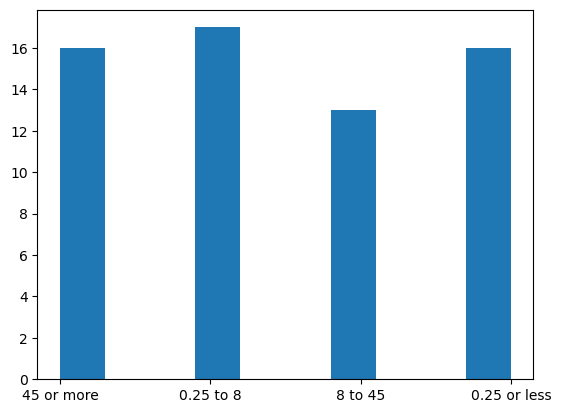

In [49]:
df['GPU_cores'] = pd.qcut(df['GPU CUDA Number of Cores (int)'], q=4, labels=
                          ['0.25 or less', '0.25 to 8', '8 to 45', '45 or more'])
plt.hist(df['GPU_cores'])
plt.show()

The above graph, again, has labels in the wrong order but the correct data associated with the label. I used the values of the quartiles for the ranges in each category. This question had wildly vast differences in numbers, so I would think that there is inaccuracies in the numbers. Many people did not respond or put 0.

## Not visualizing

### GPU

I will not visually represent the GPU category because there are so many different GPU's in the cohort. This is due to using different operating systems and using various product from that operating system.